<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [83]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import scipy.linalg as spla

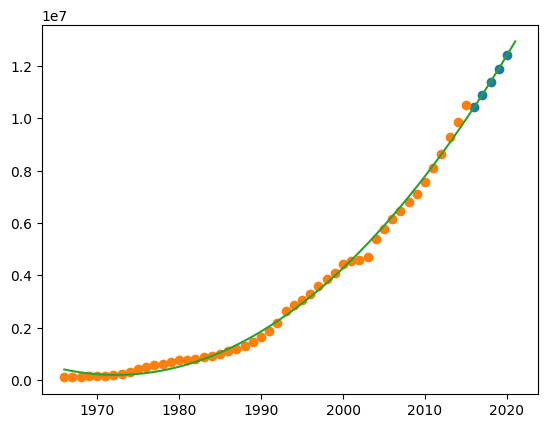

Year:2016 => Predicted value:10425370.887935638
Year:2017 => Predicted value:10904416.165802002
Year:2018 => Predicted value:11394658.174209595
Year:2019 => Predicted value:11896112.85982132
Year:2020 => Predicted value:12408796.169330597


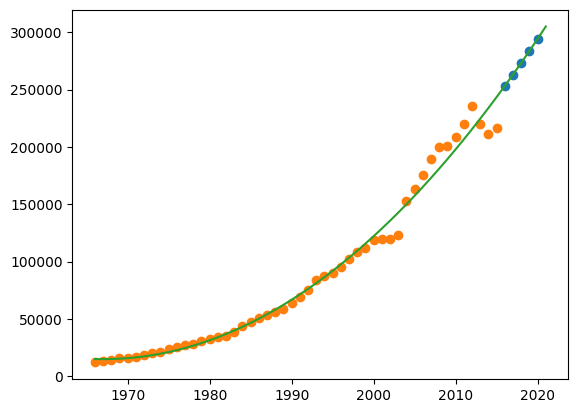

Year:2016 => Predicted value:332674.1294887662
Year:2017 => Predicted value:342623.5993562341
Year:2018 => Predicted value:352781.5305802226
Year:2019 => Predicted value:363148.21857362986
Year:2020 => Predicted value:373723.95874887705


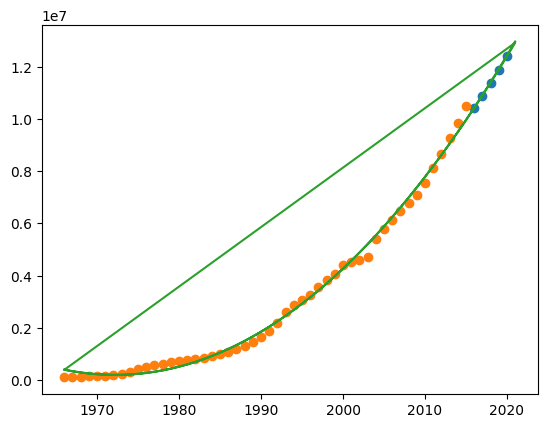

Year:2016 => Predicted value:10425370.887935638
Year:2017 => Predicted value:10904416.165802002
Year:2018 => Predicted value:11394658.174209595
Year:2019 => Predicted value:11896112.85982132
Year:2020 => Predicted value:12408796.169330597


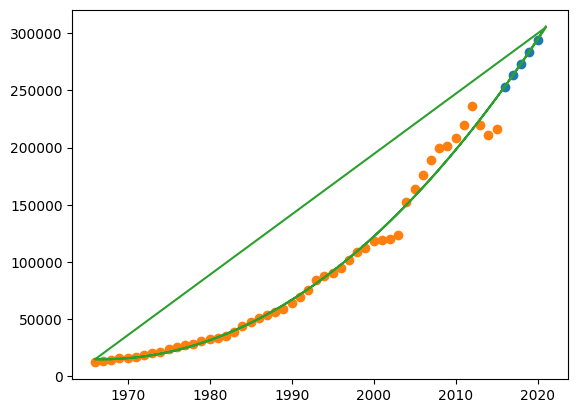

Year:2016 => Predicted value:332674.1294887662
Year:2017 => Predicted value:342623.5993562341
Year:2018 => Predicted value:352781.5305802226
Year:2019 => Predicted value:363148.21857362986
Year:2020 => Predicted value:373723.95874887705


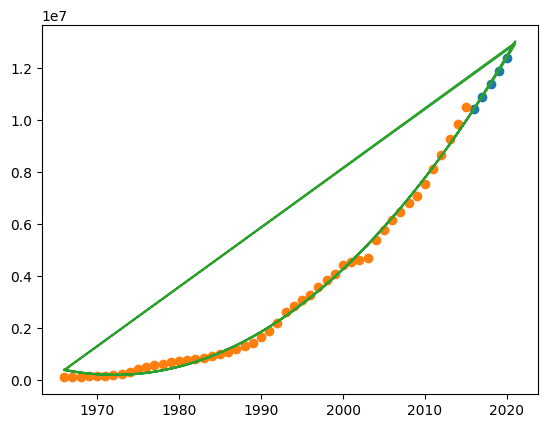

Year:2016 => Predicted value:10425370.887935638
Year:2017 => Predicted value:10904416.165802002
Year:2018 => Predicted value:11394658.174209595
Year:2019 => Predicted value:11896112.85982132
Year:2020 => Predicted value:12408796.169330597


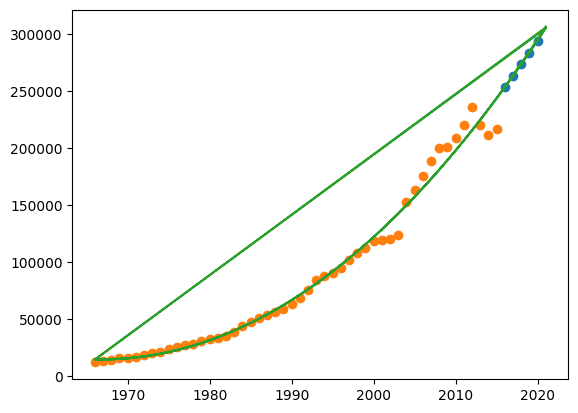

Year:2016 => Predicted value:332674.1294887662
Year:2017 => Predicted value:342623.5993562341
Year:2018 => Predicted value:352781.5305802226
Year:2019 => Predicted value:363148.21857362986
Year:2020 => Predicted value:373723.95874887705


In [84]:
df = pd.read_csv("arac.csv" , sep=';')

years = df["Year"]
cars = df["Car"]
buses = df["Bus"]
years_new=[]
cars_new=[]
buses_new=[]
epsilon1 = cars[0]
epsilon2 = buses[0]
cars -= epsilon1
buses -= epsilon2
for K in range(3, 6):
    X = np.vander(years, K + 1, increasing=True)
    w1, _, _, _ = spla.lstsq(X, cars)
    w2, _, _, _ = spla.lstsq(X, buses)
    for i in range(1966,2022):
        years_new.append(i)
        cars_new.append(np.sum(w1 * np.array([i**k for k in range(K + 1)])))
        buses_new.append(np.sum(w2 * np.array([i**k for k in range(K + 1)])))
    plt.figure()
    plt.plot(years_new[50:55], cars_new[50:55]+epsilon1, "o")
    plt.plot(years, cars+epsilon1, "o")
    plt.plot(years_new, cars_new+epsilon1, "-")
    plt.show()

    for i in range(2016,2021):
        print("Year:"+str(i)+" => Predicted value:"+str(cars_new[i-1966]+epsilon1))

    plt.figure()
    plt.plot(years_new[50:55], buses_new[50:55]+epsilon2, "o")
    plt.plot(years, buses+epsilon2, "o")
    plt.plot(years_new, buses_new+epsilon2, "-")
    plt.show()

    for i in range(2016,2021):
        print("Year:"+str(i)+" => Predicted value:"+str(buses_new[i-1966]+epsilon1))

## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [85]:
def load_data(file_name):
    df = pd.read_csv(file_name)
    X = df.to_numpy()
    return X

- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [86]:
import numpy as np

def kmeans(X, K):
    n, d = X.shape  # Number of points and dimension
    
    M = X[np.random.randint(n, size=K), :]

    # Initialize assignment matrix U
    U = np.zeros((n, K))

    # Initialize least-squares error (LSE)
    LSE = np.zeros((1, K))

    # Update centers until LSE converges
    while True:
        initial_LSE = LSE.copy()  # Create a copy of LSE

        # Assign each point to the closest center
        for i in range(n):
            min_index = np.argmin(np.linalg.norm(M - X[i], axis=1))
            U[i, :] = 0
            U[i, min_index] = 1

        # Update centers based on assigned points
        for i in range(K):
            #cluster_indices = np.where(U[:, i] == 1)[0]
            M[i] = np.mean(X[np.where(U[:, i] == 1)[0]], axis=0)
            LSE[0, i] = np.min(np.linalg.norm(M[i] - X[np.where(U[:, i] == 1)[0]], axis=1) ** 2)

        # Check if LSE has changed
        if np.array_equal(initial_LSE, LSE):
            break

    return M, U

- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch

def plot_clusters(X, M, U):
    ax = plt.axes()
    ax.set_facecolor('black')
    K = len(M)  # Number of clusters

    # Define colors and markers
    data_colors = [ "purple", "white", "gold"]
    center_colors = [ "red", "blue", "green"]
    markers = ["*", "x", "+", "o", "s"]

    # Plot each cluster
    for i in range(K):
        cluster_indices = np.where(U[:, i] == 1)[0]

        # Plot data points
        plt.plot(X[cluster_indices, 0], X[cluster_indices, 1], markers[i], c=data_colors[i])

        # Plot cluster centers
        plt.plot(M[i, 0], M[i, 1], 'o', c=center_colors[i])

        # Calculate radius for circle
        radius = np.max(np.linalg.norm(M[i] - X[cluster_indices], axis=1)) + 0.3

        # Plot a circle around the points
        circle = pch.Circle((M[i, 0], M[i, 1]), radius=radius, color=data_colors[i], fill=False)
        plt.gca().add_patch(circle)

    # Set labels and title
    plt.xlabel("x")
    plt.ylabel("y")
    # Show the plot
    plt.show()
    



**<font color="red"> Don't edit the code in the following cell!</font>**

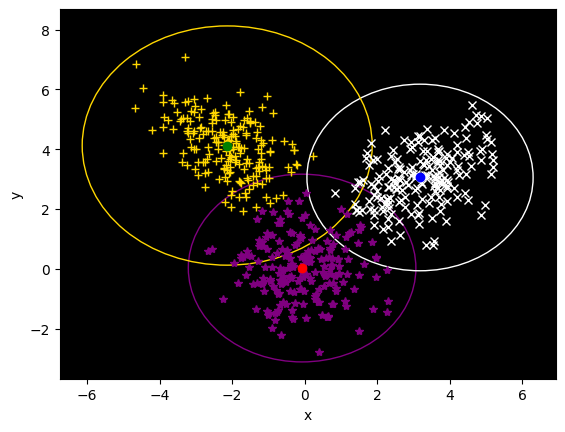

In [101]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

---

**K-means-LSE Clustering:**

K-means-LSE clustering is a variant of the classic **k-means clustering algorithm** that incorporates the **least squares error (LSE)** criterion instead of the traditional **sum of squared errors (SSE)** criterion. Let's delve into the details:

1. **Objective and Intuition**:
   - Like k-means, K-means-LSE aims to partition data points into clusters based on their similarity.
   - The LSE criterion minimizes the weighted sum of distances from each data point to its assigned cluster center.
   - The weights are proportional to the inverse of the cluster sizes, promoting balanced clusters.

2. **Comparison with SSE**:
   - SSE minimization (used in standard k-means) tends to create clusters with varying sizes.
   - LSE, on the other hand, encourages more evenly sized clusters, which can be advantageous for certain applications.

3. **Advantages of K-means-LSE**:
   - **Balanced Clusters**: LSE tends to produce clusters with similar sizes, reducing bias toward larger clusters.
   - **Improved Interpretability**: Balanced clusters make it easier to interpret and analyze results.

4. **Disadvantages of K-means-LSE**:
   - **Computational Cost**: Solving a system of linear equations at each iteration is more expensive than SSE-based updates.
   - **Sensitivity to Initialization**: Different initializations can lead to different results.
   - **Assumption of Spherical Clusters**: LSE assumes spherical clusters with equal variances, which may not hold for all datasets.

5. **Analyzing K-means-LSE Results**:
   - **Visualization**: Plotting clusters and their centers on scatter plots or contour plots.
   - **Cluster Validity Indices**: Calculate indices like silhouette coefficient, Davies-Bouldin index, or Calinski-Harabasz index.
   - **Hypothesis Tests**: Perform ANOVA or Kruskal-Wallis tests to assess significant differences between cluster means or medians.
   - **Post-hoc Analysis**: Apply Tukey's HSD test or Dunn's test to identify significantly different cluster pairs.

In summary, K-means-LSE strikes a balance between cluster quality and computational cost, making it a valuable tool for certain scenarios. However, practitioners should carefully consider its assumptions and explore alternative clustering methods as needed.

---


- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

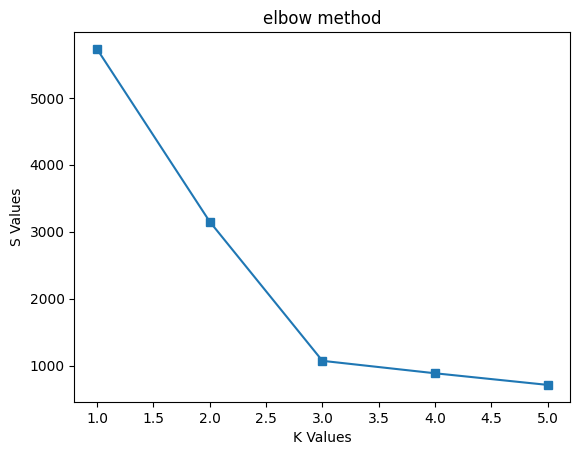

In [105]:
def elbow_method(X, KList):
    n, d = X.shape  # Number of points and dimension
    Knum = len(KList) 
    S = np.zeros((Knum, 1))
    # For each K, calculate the SSE
    for K in range(Knum):
        # Cluster the data using K-means
        M, U = kmeans(X, KList[K])
        # For each cluster, calculate the SSE
        for i in range(K_list[K]):
            S[K, 0] += np.sum(np.linalg.norm(M[i] - X[np.where(U[:, i] == 1)[0]], axis=1) ** 2)
    return S
#--------------------------evaluate
X = load_data('Image.csv')
KList = [1, 2, 3, 4, 5]
plt.plot(KList, elbow_method(X,KList), marker='s')
plt.xlabel("K Values")
plt.ylabel("S Values")
plt.title("elbow method")
plt.show()


---

The primary objective of the elbow method is to identify the point at which the within-cluster sum of squares (WCSS) is plotted against the number of clusters (k). By visually analyzing this plot, we search for the "elbow" or the point at which the curve exhibits a sharp change in slope, giving the appearance of an elbow. This point signifies the optimal number of clusters for the given dataset.
The rationale behind selecting the number of clusters at the elbow point is that beyond this point, the improvement in model performance achieved by adding more clusters becomes marginal. Consequently, the elbow method empowers data analysts and machine learning practitioners to make informed decisions regarding the number of clusters to use, leading to more efficient and effective clustering outcomes.

---

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [107]:
# TODO: First 25 rows of the dataset

import pandas as pd

df = pd.read_csv("sentiment.csv", nrows=25)

print(df.to_string(index=False))


 PhraseId  SentenceId                                                                                                                                                                                       Phrase  Sentiment
        1           1 A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .          1
        2           1                                                                                                                A series of escapades demonstrating the adage that what is good for the goose          2
        3           1                                                                                                                                                                                     A series          2
        4           1                                                                                           

In [108]:
# TODO: Last 10 rows of the dataset
import pandas as pd

df = pd.read_csv("sentiment.csv")

print(df.tail(10).to_string(index=False))


 PhraseId  SentenceId                                                        Phrase  Sentiment
     9991         419                                this a comedy or serious drama          2
     9992         419                                     a comedy or serious drama          2
     9993         419                                                   a comedy or          2
     9994         419                                                      a comedy          2
     9995         419                                                 serious drama          2
     9996         420 plays like some corny television production from a bygone era          1
     9997         420                              plays like some corny television          1
     9998         420                                    like some corny television          2
     9999         420                                         some corny television          1
    10000         420                             

In [109]:
# TODO: information of columns 
import pandas as pd

df = pd.read_csv("sentiment.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    10000 non-null  int64 
 1   SentenceId  10000 non-null  int64 
 2   Phrase      10000 non-null  object
 3   Sentiment   10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


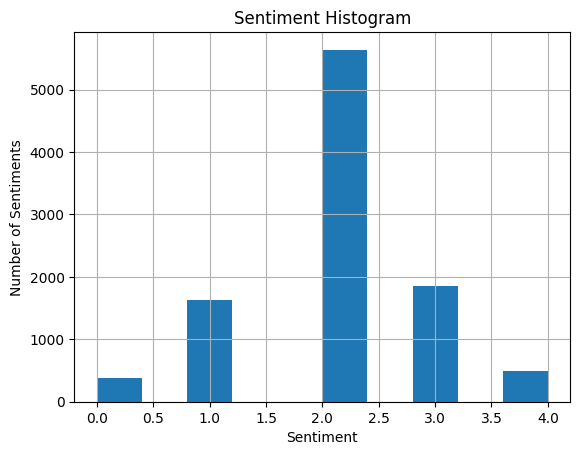

In [111]:
# TODO: histogram of sentiment scores
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sentiment.csv" , usecols= ["Sentiment"])
df.hist()
plt.xlabel("Sentiment")
plt.ylabel("Number of Sentiments")
plt.title("Sentiment Histogram")
plt.show()

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [112]:
import re
from nltk.corpus import stopwords
def preprocess_text(text):
    # TODO:
    text = text.lower()
    text = re.sub(r"[^\w\s']","", text)
    stop_words = set(stopwords.words("english"))
    tokens = text.split()
    filtered_tokens =[token for token in tokens if token not in stop_words]
    text = ' '.join(filtered_tokens)
    
    return text


In [113]:
# TODO: Apply the preprocessing function to the text column
df = pd.read_csv("sentiment.csv")
phrase = df.loc[:, 'Phrase']
phrase = phrase.apply(preprocess_text)


### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

The Bag-of-Words (BoW) technique is a fundamental method for feature extraction from text data. It is widely used in natural language processing (NLP) and information retrieval tasks. Let’s dive into what BoW is and how it works:\
BoW is an approach that represents text documents as a collection of individual words (or tokens) without considering their order or grammar.\
It creates a vocabulary of all unique words occurring in the training set.\
Each document is then represented by a vector where each element corresponds to the count (or frequency) of a specific word in the vocabulary.\
BoW is commonly used for:
- Text classification: Assigning labels or categories to documents.
- Information retrieval: Finding relevant documents based on query terms.
- Document clustering: Grouping similar documents together.

## How BoW Works:
Vocabulary Creation:
- Collect all unique words (tokens) from the entire training dataset.
- These words form the vocabulary.

Vector Representation:
- Each document is represented by a vector of the same length as the vocabulary.
- Initialize the vector with zeros.
- For each word in the vocabulary, increment the corresponding vector element if the word appears in the document.

Sparse Vectors:
- Since most documents contain only a subset of the entire vocabulary, the resulting vectors are often sparse (many zero values).
- Sparse vectors can be memory-intensive and computationally expensive for modeling.

Example:
- Consider two sentences:
  - “John likes to watch movies. Mary likes movies too.”
  - “John also likes to watch football games.”
- Vocabulary: [‘John’, ‘likes’, ‘to’, ‘watch’, ‘movies’, ‘Mary’, ‘too’, ‘also’, ‘football’, ‘games’]
- Document vectors:
  - Sentence 1: [1, 2, 1, 1, 2, 1, 1, 0, 0, 0]
  - Sentence 2: [1, 1, 1, 1, 0, 0, 0, 1, 1, 1]


In [114]:
# TODO: Extract features from the preprocessed text data
vectorizer = CountVectorizer()

# Fit and transform the Phrase column
X = vectorizer.fit_transform(phrase)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# TODO: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.2, random_state=0)

# TODO: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# TODO: Make predictions on the testing set
y_pred = model.predict(X_test)

# TODO: Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error is {mse:.3f}')


Mean squared error is 0.429


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

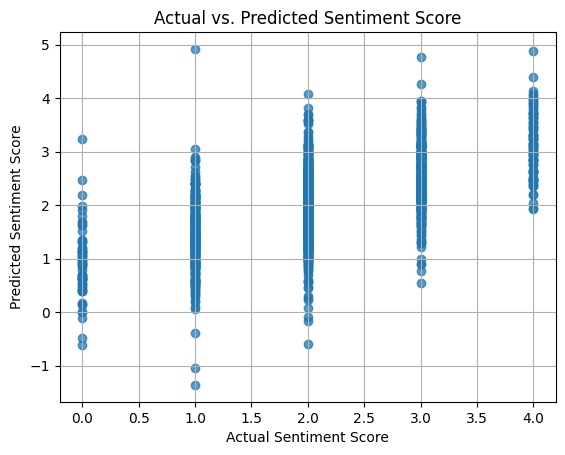

In [121]:
plt.scatter(y_test, y_pred, alpha=0.75)
plt.xlabel("Actual Sentiment Score") 
plt.ylabel("Predicted Sentiment Score") 
plt.title("Actual vs. Predicted Sentiment Score")
plt.grid(True)
plt.show()

## <font color="red"> Discuss the resulted figure </font>
between 1 and 4 sentiment score,the  average for predicted  value will be so close to the actual value . \
for example the predicted value for sentiment score =  2 and the average predicted value are somehow equal . \
by increasing the sentiment value the average predicted value will be more than the actual value and for smaller values for sentiment score\
the actual sentiment value will be more than the average predicted value. it depends on the train test size and random state ...\

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [122]:
import numpy as np
import re
def create_feature_matrix(phrase):
    tokens = [re.split("\s+", text) for text in phrase]
    unique_tokens = set(token for sublist in tokens for token in sublist)
    num_phrases = len(phrase)
    num_tokens = len(unique_tokens)
    matrix = np.zeros((num_phrases, num_tokens))
    token_index = {token: i for i, token in enumerate(unique_tokens)}
    for i, token_list in enumerate(tokens):
        for token in token_list:
            matrix[i][token_index[token]] += 1
    return matrix, list(unique_tokens)
X_manual, feature_names_manual = create_feature_matrix(phrase)